# Práctica de Visualización.
### Equipo: 2
### Grupo: 003
### Frecuencia: Lunes 
### Integrantes: 
- 1726724 Tolentino Vargas Areli Fernanda
- 1816658 Martinez Martinez Arlette
- 1728777 Navarro Sosa Leslie Paola
- 1794335 Prado Porras Nadia Valeria
- 1812288 Reyes Joaquin Dayana Guadalupe

##### 1) Base de datos:
- [Life Expentancy (Who)](https://www.kaggle.com/kumarajarshi/life-expectancy-who)
- [Netflix](https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv)



# **Primera base de datos**
## **Esperanza de Vida**

- Importar librerías y leer los datos.

In [61]:
import pandas as pd
import numpy as np
import matplotlib as plt
import json
import io
import csv

Datos= pd.read_csv('Life Expectancy Data.csv',na_values=[" "])

##### 2) Limpieza de datos:
- Renombrando las columnas y borrando columnas que no son de nuestro interés.

In [3]:
Datos.rename(columns = {'Country':'Pais','Year':'Anio','Status':'Estatus','Life expectancy ':'Esperanza_de_Vida','Adult Mortality':'Mortalidad_de_adultos','infant deaths':'Mortalidad_infantil','percentage expenditure':'Porcentaje_de_gastos','Hepatitis B':'Hepatitis_B' ,'Measles ':'Sarampion', 'Polio':'Poliomelitis', 'Total expenditure':'Gasto_total', 'Diphtheria ':'Difteria', ' HIV/AIDS': 'VIH_SIDA' ,'Population':'Poblacion',' thinness  1-19 years':'Delgadez_1a19',' thinness 5-9 years':'Delgadez_5a9', 'Income composition of resources':'Composicion_de_los_ingresos_de_los_recursos', 'Schooling':'Escolarizacion','under-five deaths ':'muertes_niños','GDP':'PIB',' BMI ':'indice_masa_corporal'},inplace=True)
df=Datos.drop(['Delgadez_5a9','Delgadez_1a19','Porcentaje_de_gastos','Gasto_total','PIB','Composicion_de_los_ingresos_de_los_recursos','Escolarizacion'], axis = 1 )
df

,Pais,Anio,Estatus,Esperanza_de_Vida,Mortalidad_de_adultos,Mortalidad_infantil,Alcohol,Hepatitis_B,Sarampion,indice_masa_corporal,muertes_niños,Poliomelitis,Difteria,VIH_SIDA,Poblacion
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,65.0,1154,19.1,83,6.0,65.0,0.1,33736494.0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,62.0,492,18.6,86,58.0,62.0,0.1,327582.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,64.0,430,18.1,89,62.0,64.0,0.1,31731688.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,67.0,2787,17.6,93,67.0,67.0,0.1,3696958.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,68.0,3013,17.2,97,68.0,68.0,0.1,2978599.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,68.0,31,27.1,42,67.0,65.0,33.6,12777511.0
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,7.0,998,26.7,41,7.0,68.0,36.7,12633897.0
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,73.0,304,26.3,40,73.0,71.0,39.8,125525.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,76.0,529,25.9,39,76.0,75.0,42.1,12366165.0


##### 3) Información estadística básica

Total de muertes de niños en todos los países considerados del 2000 al 2015.

In [4]:
df['muertes_niños'].sum()

123501

Promedio de la esperanza de vida del año 2000 de todos los países.

In [5]:
año_2000_EsperanzaVida=df[df['Anio']==2000.0].Esperanza_de_Vida
año_2000_EsperanzaVida.mean()

66.75027322404374

Suma acumulada de muertes por cada 1 000 nacidos vivos con VIH/SIDA (0-4 años) en todos los países en el año 2015.

In [6]:
año_2015_VIH_SIDA=df[df['Anio']==2015.0].VIH_SIDA
año_2015_VIH_SIDA.cumsum()

0         0.1
16        0.2
32        0.3
48        2.2
64        2.4
        ...  
2858    110.4
2874    110.5
2890    110.6
2906    114.7
2922    120.9
Name: VIH_SIDA, Length: 183, dtype: float64

Resumen estadístico de la Esperanza de vida del país México del año 2000 al 2015.

In [7]:
pais_Mexico_EsperanzaVida= df[df['Pais']=='Mexico'].Esperanza_de_Vida
print('Esperanza de Vida de México: \n',pais_Mexico_EsperanzaVida)
print('\nResumen Estadìstico:\n',pais_Mexico_EsperanzaVida.describe())

Esperanza de Vida de México: 
 1683    76.7
1684    76.6
1685    76.6
1686    76.3
1687    76.1
1688    75.6
1689    75.7
1690    75.6
1691    76.0
1692    75.8
1693    75.3
1694    75.4
1695    75.0
1696    75.0
1697    75.0
1698    74.8
Name: Esperanza_de_Vida, dtype: float64

Resumen Estadìstico:
 count    16.000000
mean     75.718750
std       0.620987
min      74.800000
25%      75.225000
50%      75.650000
75%      76.150000
max      76.700000
Name: Esperanza_de_Vida, dtype: float64


Conteo de elementos no nulos en la columna Alcohol.

In [8]:
print("\nExistencia de datos nulos por columna:\n",df.isnull().any())
print("\nCantidad de datos nulos por columna:\n",df.isnull().sum())
print('\nCantidad de datos no nulos de la columna Alcohol: ', df['Alcohol'].count())


Existencia de datos nulos por columna:
 Pais                     False
Anio                     False
Estatus                  False
Esperanza_de_Vida         True
Mortalidad_de_adultos     True
Mortalidad_infantil      False
Alcohol                   True
Hepatitis_B               True
Sarampion                False
indice_masa_corporal      True
muertes_niños            False
Poliomelitis              True
Difteria                  True
VIH_SIDA                 False
Poblacion                 True
dtype: bool

Cantidad de datos nulos por columna:
 Pais                       0
Anio                       0
Estatus                    0
Esperanza_de_Vida         10
Mortalidad_de_adultos     10
Mortalidad_infantil        0
Alcohol                  194
Hepatitis_B              553
Sarampion                  0
indice_masa_corporal      34
muertes_niños              0
Poliomelitis              19
Difteria                  19
VIH_SIDA                   0
Poblacion                652
dtype: i

Resumen estadístico de la Esperanza de Vida de todos los países del año 2015.

In [9]:
año_2015_EsperanzaVida=df[df['Anio']==2015.0].Esperanza_de_Vida
print('Conteo', año_2015_EsperanzaVida.count())
print('Media', año_2015_EsperanzaVida.mean())
print('Desviación Estandar', año_2015_EsperanzaVida.std())
print('Mínimo', año_2015_EsperanzaVida.min())
print('Máximo ', año_2015_EsperanzaVida.max())
print('Mediana', año_2015_EsperanzaVida.median())
print('Varianza', año_2015_EsperanzaVida.var())
print('Asimetría ', año_2015_EsperanzaVida.skew())
print('Curtosis', año_2015_EsperanzaVida.kurt())

Conteo 183
Media 71.61693989071036
Desviación Estandar 8.123706147645304
Mínimo 51.0
Máximo  88.0
Mediana 73.9
Varianza 65.9946015732901
Asimetría  -0.4945967018337147
Curtosis -0.44680156454718745


Correlación de los datos.

In [10]:
df.corr()

,Anio,Esperanza_de_Vida,Mortalidad_de_adultos,Mortalidad_infantil,Alcohol,Hepatitis_B,Sarampion,indice_masa_corporal,muertes_niños,Poliomelitis,Difteria,VIH_SIDA,Poblacion
Anio,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.134337,-0.139741,0.016969
Esperanza_de_Vida,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.479495,-0.556556,-0.021538
Mortalidad_de_adultos,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.275131,0.523821,-0.013647
Mortalidad_infantil,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.175171,0.025231,0.556801
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.222020,-0.048845,-0.035252
Hepatitis_B,0.104333,0.256762,-0.162476,-0.223566,0.087549,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.611495,-0.112675,-0.123321
Sarampion,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.141882,0.030899,0.265966
indice_masa_corporal,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.283147,-0.243717,-0.072301
muertes_niños,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.195668,0.038062,0.544423
Poliomelitis,0.094158,0.465556,-0.274823,-0.170689,0.221734,0.486171,-0.136166,0.284569,-0.188720,1.000000,0.673553,-0.159560,-0.038540


Covarianza de los datos.

In [12]:
df.cov()

,Anio,Esperanza_de_Vida,Mortalidad_de_adultos,Mortalidad_infantil,Alcohol,Hepatitis_B,Sarampion,indice_masa_corporal,muertes_niños,Poliomelitis,Difteria,VIH_SIDA,Poblacion
Anio,2.128753e+01,7.466211e+00,-4.530099e+01,-2.035724e+01,-9.319021e-01,1.147744e+01,-4.364552e+03,1.007655e+01,-3.178497e+01,1.017423e+01,1.469466e+01,-3.273873e+00,4.771411e+06
Esperanza_de_Vida,7.466211e+00,9.070405e+01,-8.243093e+02,-2.211084e+02,1.566435e+01,5.412236e+01,-1.723845e+04,1.075074e+02,-3.405787e+02,1.035024e+02,1.079214e+02,-2.695626e+01,-1.292010e+07
Mortalidad_de_adultos,-4.530099e+01,-8.243093e+02,1.544852e+04,1.156193e+03,-9.939165e+01,-4.804433e+02,4.450792e+04,-9.569895e+02,1.880456e+03,-7.980218e+02,-8.088108e+02,3.311031e+02,-1.074510e+08
Mortalidad_infantil,-2.035724e+01,-2.211084e+02,1.156193e+03,1.390666e+04,-5.627989e+01,-5.866675e+02,6.776735e+05,-5.402210e+02,1.885700e+04,-4.730680e+02,-4.914787e+02,1.510865e+01,4.474351e+09
Alcohol,-9.319021e-01,1.566435e+01,-9.939165e+01,-5.627989e+01,1.642205e+01,8.836352e+00,-2.454997e+03,2.675036e+01,-7.452989e+01,2.098374e+01,2.139245e+01,-1.035875e+00,-8.960531e+06
Hepatitis_B,1.147744e+01,5.412236e+01,-4.804433e+02,-5.866675e+02,8.836352e+00,6.285057e+02,-2.881926e+04,7.520121e+01,-8.233259e+02,2.654561e+02,3.288785e+02,-1.446941e+01,-2.143913e+08
Sarampion,-4.364552e+03,-1.723845e+04,4.450792e+04,6.776735e+05,-2.454997e+03,-2.881926e+04,1.314983e+08,-4.067260e+04,9.343034e+05,-3.669537e+04,-3.870720e+04,1.799181e+03,1.873944e+11
indice_masa_corporal,1.007655e+01,1.075074e+02,-9.569895e+02,-5.402210e+02,2.675036e+01,7.520121e+01,-4.067260e+04,4.017633e+02,-7.685319e+02,1.332090e+02,1.343270e+02,-2.493284e+01,-8.838424e+07
muertes_niños,-3.178497e+01,-3.405787e+02,1.880456e+03,1.885700e+04,-7.452989e+01,-8.233259e+02,9.343034e+05,-7.685319e+02,2.574277e+04,-7.116265e+02,-7.469237e+02,3.100902e+01,5.947125e+09
Poliomelitis,1.017423e+01,1.035024e+02,-7.980218e+02,-4.730680e+02,2.098374e+01,2.654561e+02,-3.669537e+04,1.332090e+02,-7.116265e+02,5.488733e+02,3.742538e+02,-1.903485e+01,-5.669602e+07


# **Graficar datos univariantes**

### **Gráfica de barras y datos categóricos**

Se utilizarán únicamente los datos del año 2015, de los cuales, se harán categorías acerca del estatus de los países.

Base de datos unicamente del año 2015:
                                     Pais  Anio     Estatus  Esperanza_de_Vida  \
0                            Afghanistan  2015  Developing               65.0   
16                               Albania  2015  Developing               77.8   
32                               Algeria  2015  Developing               75.6   
48                                Angola  2015  Developing               52.4   
64                   Antigua and Barbuda  2015  Developing               76.4   
...                                  ...   ...         ...                ...   
2858  Venezuela (Bolivarian Republic of)  2015  Developing               74.1   
2874                            Viet Nam  2015  Developing               76.0   
2890                               Yemen  2015  Developing               65.7   
2906                              Zambia  2015  Developing               61.8   
2922                            Zimbabwe  2015  Developing           

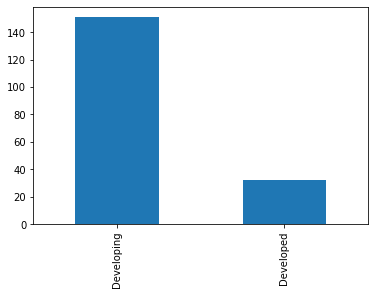

In [4]:
Data2015= df.loc[Datos.Anio==2015]
print('Base de datos unicamente del año 2015:\n',Data2015)
print('\nGráfica comparativa de estatus de los países\n',Data2015['Estatus'].value_counts().plot.bar())

Gráfica de la proporción de cada estatus del total de países.

<AxesSubplot:>

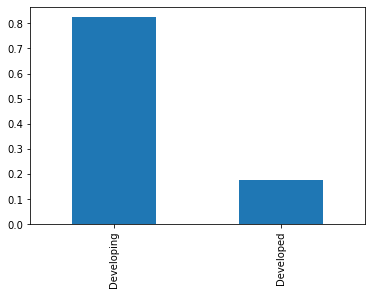

In [14]:
(Data2015['Estatus'].value_counts() / len(Data2015)).plot.bar()

Conclusión: Observamos que la mayoría de los países del año 2015 estan en desarrollo siendo estos el 80% y solo el 20% de los países son desarrollados.



Gráfica de la Mortalidad infantil

<AxesSubplot:>

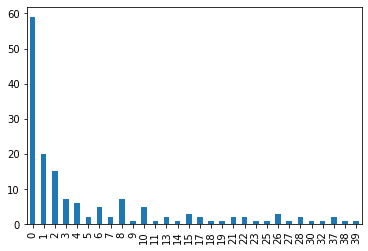

In [15]:
Data2015['Mortalidad_infantil'].value_counts().sort_index().head(30).plot.bar()

**Pregunta 1.**

Que representan los datos de la gráfica de arriba:

La gráfica anterior muestra el número de muertes de niños (antes de cumplir un año) en el 2015 por cada 1000 nacimientos vivos registrados de los primeros 30 países ordenados alfabéticamente en nuestra base de datos.

### **Gráficas de líneas**

<AxesSubplot:>

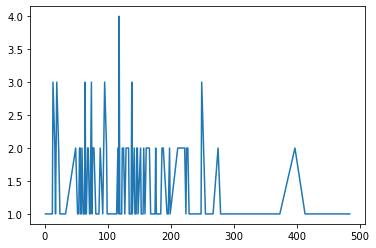

In [10]:
Data2015['Mortalidad_de_adultos'].value_counts().sort_index().plot.line()

<AxesSubplot:>

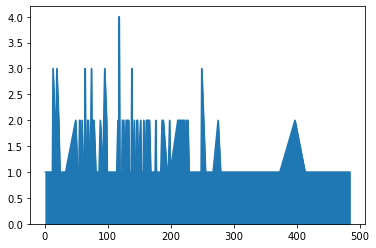

In [8]:
Data2015['Mortalidad_de_adultos'].value_counts().sort_index().plot.area()

Conclusión: Éstas gráficas nos muestran como se distribuye la mortalidad de los adultos, tanto en líneas como en una figura que es el área.

### **Histograma**

Histograma de la esperanza de vida solo del año 2015.

<AxesSubplot:ylabel='Frequency'>

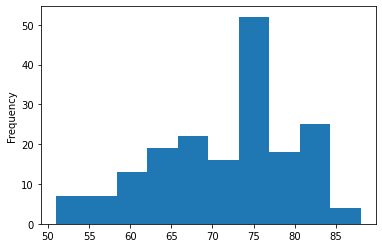

In [11]:
Data2015['Esperanza_de_Vida'].plot.hist()

Conclusión: Este gráfico nos muestra la frecuencia de la esperanza de vida en las personas. Podemos ver que en el año 2015 menos de 10 personas llegaron a la edad de 85 años.

# **Graficar datos bi-variantes.**

### **Scatter plot**

Mapa bidimensional de la esperanza de vida del 2015 contra la cobertura de inmunización por hepatitis B (HepB) en porcentaje de niños de 1 año en el 2015.

<AxesSubplot:xlabel='Esperanza_de_Vida', ylabel='Hepatitis_B'>

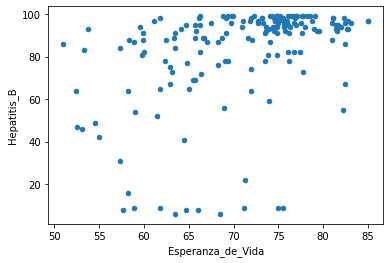

In [12]:
Data2015.plot.scatter(x='Esperanza_de_Vida', y='Hepatitis_B')

Conclusión: Hay más personas que tenían hepatitis B después de tener 75 años.

### **Hexplot**
Mapa bidimensional de la esperanza de vida del 2015 contra la cobertura de inmunización contra la poliomielitis (Pol3) en porcentaje de niños de 1 año.

<AxesSubplot:xlabel='Esperanza_de_Vida', ylabel='Poliomelitis'>

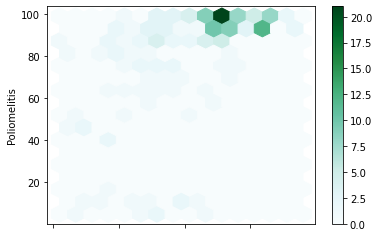

In [13]:
Data2015.plot.hexbin(x='Esperanza_de_Vida', y='Poliomelitis', gridsize=15)

<AxesSubplot:xlabel='Esperanza_de_Vida', ylabel='Poliomelitis'>

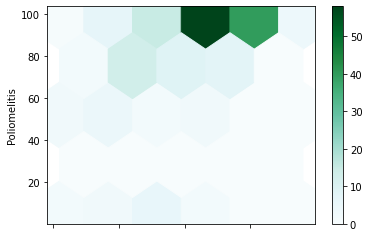

In [14]:
Data2015.plot.hexbin(x='Esperanza_de_Vida', y='Poliomelitis', gridsize=5)

Conclusión: Existían al menos 100 personas con inmunización contra la poliomielitis (Pol3) entre los niños de 1 año o más.

### **Stacked plots**

Gráficas para comparación de cobertura de inmunización por hepatitis B (HepB), poliomelitis (Pol3) y difteria tétanos y tos ferina en porcentaje de niños de 1 año.

In [15]:
DS= Data2015.drop(['Pais','Estatus','Anio','Estatus','Esperanza_de_Vida','Mortalidad_de_adultos','Mortalidad_infantil','Sarampion','indice_masa_corporal','Alcohol','VIH_SIDA','Poblacion','muertes_niños'], axis = 1 ).head(10)
DS

,Hepatitis_B,Poliomelitis,Difteria
0,65.0,6.0,65.0
16,99.0,99.0,99.0
32,95.0,95.0,95.0
48,64.0,7.0,64.0
64,99.0,86.0,99.0
80,94.0,93.0,94.0
96,94.0,96.0,94.0
112,93.0,93.0,93.0
128,93.0,93.0,93.0
144,96.0,98.0,96.0


<AxesSubplot:>

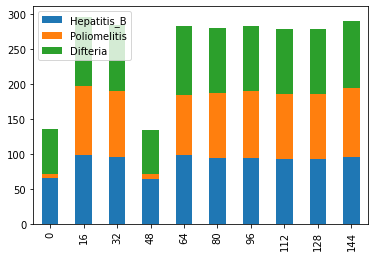

In [16]:
DS.plot.bar(stacked=True)

<AxesSubplot:>

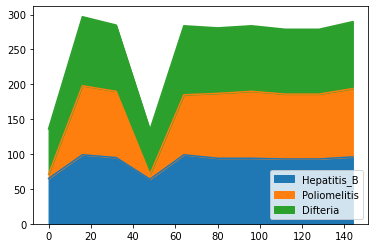

In [17]:
DS.plot.area()

<AxesSubplot:>

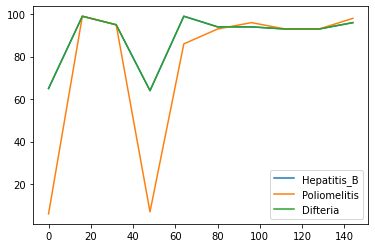

In [18]:
DS.plot.line()

Conclusión: Podemos decir que la enfermedad poco cubierta en niños de 1 año es la poliomelitis, seguida de la hepatitis B, esto nos indica que talvez por ser enfermedades poco habladas, no se tiene la conciencia de tal enfermedad.

In [21]:
import seaborn as sns

Gráfica de la cobertura de inmunización por hepatitis B (HepB) en porcentaje de niños de 1 año en el 2015 en los primeros 20 países ordenados alfabéticamente.

C:\Users\lesli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hepatitis_B', ylabel='count'>

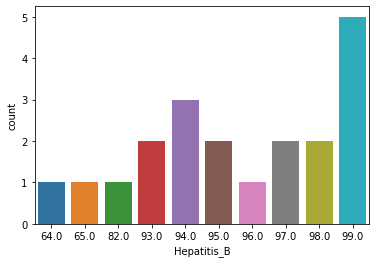

In [22]:
sns.countplot(Data2015['Hepatitis_B'].head(20))

Conclusión: En el 2015, solo 5 países de 20 tienen inmunización por hepatitis B al 99% en niños de 1 año.

Gráfica de la cobertura de inmunización contra la poliomelitis (Pol3) en porcentaje de niños de 1 año en los primeros 20 países ordenados alfabéticamente.

C:\Users\lesli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Poliomelitis', ylabel='count'>

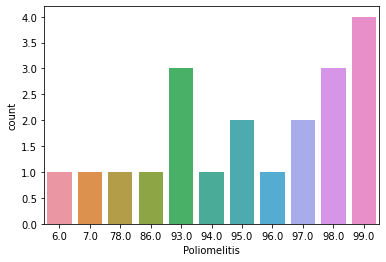

In [25]:
sns.countplot(Data2015['Poliomelitis'].head(20))

Conclusión: En el 2015, solo 9 países de 20 tienen entre 97% a 99% de inmunización por poliomelitis en niños de 1 año.

Gráfica de la cobertura de inmunización por difteria tétanos y tos ferina (DTP3) en porcentaje de niños de 1 año en los primeros 20 países ordenados alfabéticamente.

C:\Users\lesli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Difteria', ylabel='count'>

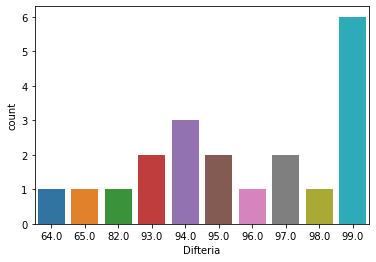

In [26]:
sns.countplot(Data2015['Difteria'].head(20))

Conclusión: En el 2015, solo 6 países de 20 tienen inmunización por difteria tétanos y tos ferina (DTP3) al 99% en niños de 1 año.

Gráficas de KDE para comparación de cobertura de inmunización por hepatitis B (HepB), poliomelitis (Pol3) y difteria tétanos y tos ferina en porcentaje de niños de 1 año.

<AxesSubplot:xlabel='Hepatitis_B', ylabel='Density'>

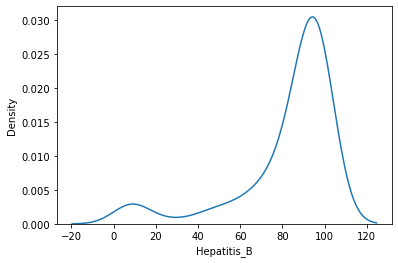

In [27]:
sns.kdeplot(Data2015['Hepatitis_B'])

<AxesSubplot:xlabel='Poliomelitis', ylabel='Density'>

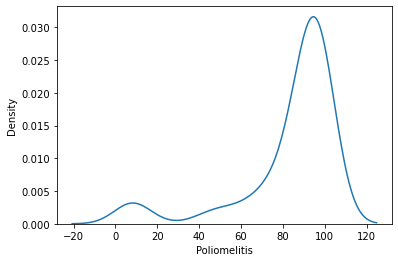

In [28]:
sns.kdeplot(Data2015['Poliomelitis'])

<AxesSubplot:xlabel='Difteria', ylabel='Density'>

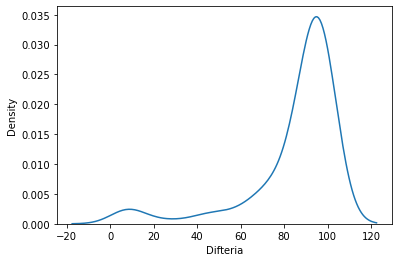

In [29]:
sns.kdeplot(Data2015['Difteria'])

Comparación con gráficas de matplotlib

<AxesSubplot:>

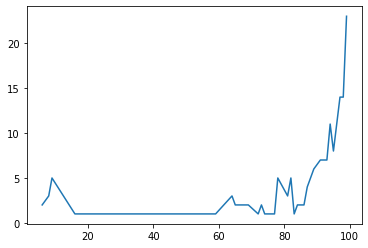

In [30]:
Data2015['Hepatitis_B'].value_counts().sort_index().plot.line()

<AxesSubplot:>

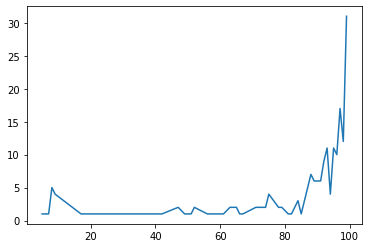

In [31]:
Data2015['Poliomelitis'].value_counts().sort_index().plot.line()

<AxesSubplot:>

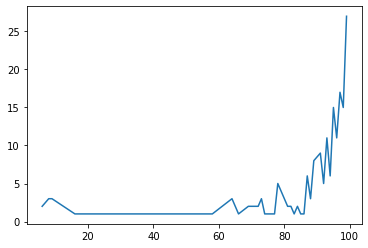

In [32]:
Data2015['Difteria'].value_counts().sort_index().plot.line()

KDEplots de esperanza de vida vs. cobertura de inmunización por hepatitis B (HepB), vs. poliomelitis (Pol3) y vs. difteria tétanos y tos ferina en porcentaje de niños de 1 año.

C:\Users\lesli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Esperanza_de_Vida', ylabel='Hepatitis_B'>

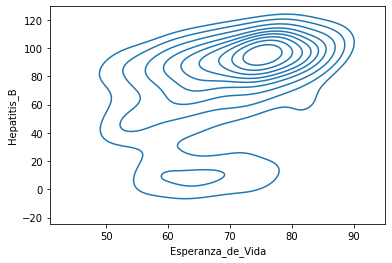

In [33]:
sns.kdeplot(Data2015['Esperanza_de_Vida'],Data2015['Hepatitis_B'].dropna())

C:\Users\lesli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Esperanza_de_Vida', ylabel='Poliomelitis'>

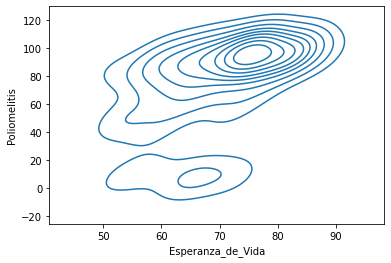

In [34]:
sns.kdeplot(Data2015['Esperanza_de_Vida'],Data2015['Poliomelitis'].dropna())

C:\Users\lesli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Esperanza_de_Vida', ylabel='Difteria'>

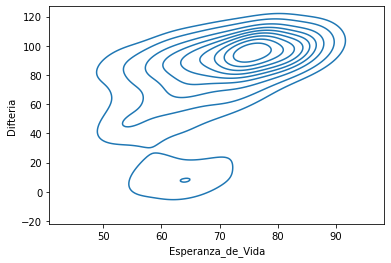

In [35]:
sns.kdeplot(Data2015['Esperanza_de_Vida'],Data2015['Difteria'].dropna())

Gráficas de distancias de cobertura de inmunización por hepatitis B (HepB), poliomelitis (Pol3) y difteria tétanos y tos ferina en porcentaje de niños de 1 año.

C:\Users\lesli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hepatitis_B'>

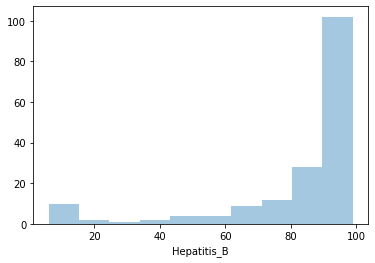

In [36]:
sns.distplot(Data2015['Hepatitis_B'], bins=10, kde=False)

<AxesSubplot:xlabel='Poliomelitis'>

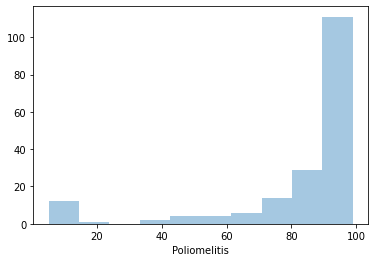

In [37]:
sns.distplot(Data2015['Poliomelitis'], bins=10, kde=False)

<AxesSubplot:xlabel='Difteria'>

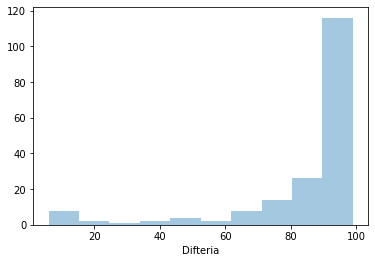

In [38]:
sns.distplot(Data2015['Difteria'], bins=10, kde=False)

Conclusión: Entre el 80% a 100% de niños de 1 año fueron cubiertos por la inmunización de hepatitis B, poliomelitis y difteria tétanos y tos ferina.

### **Jointplots**
De esperanza de vida vs. cobertura de inmunización por hepatitis B (HepB), vs. poliomelitis (Pol3) y vs. difteria tétanos y tos ferina en porcentaje de niños de 1 año.

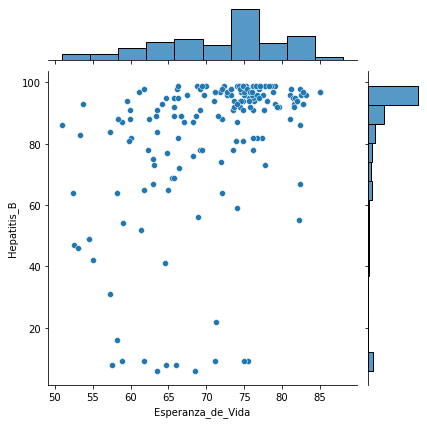

In [39]:
sns.jointplot(x='Esperanza_de_Vida', y='Hepatitis_B', data=Data2015)

Conclusión: Hay más personas que tenían hepatitis B después de tener 75 años.

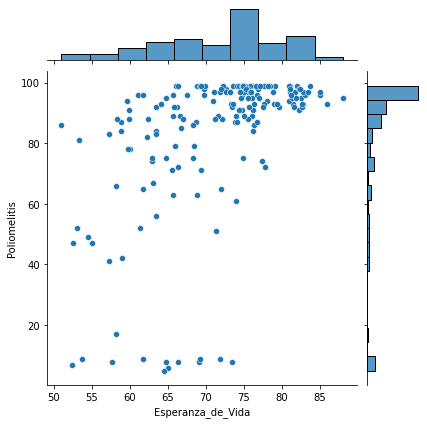

In [40]:
sns.jointplot(x='Esperanza_de_Vida', y='Poliomelitis', data=Data2015)

Conclusión: Existían al menos 100 personas con inmunización contra la poliomielitis (Pol3) entre los niños de 1 año o más.

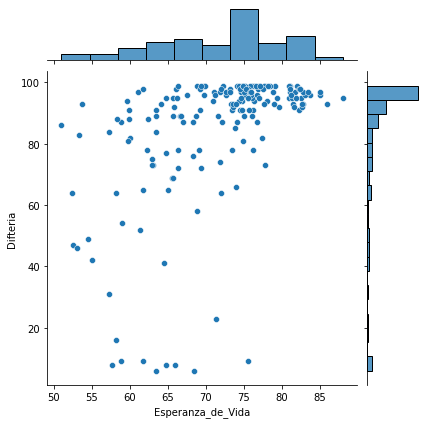

In [41]:
sns.jointplot(x='Esperanza_de_Vida', y='Difteria', data=Data2015)

Conclusión: El 100% de las personas tenian cobertura de vacunación con toxoide tetánico diftérico y tos ferina (DTP3) en niños de 1 año. Estas tienen una esperanza de vida de hasta 85 años.

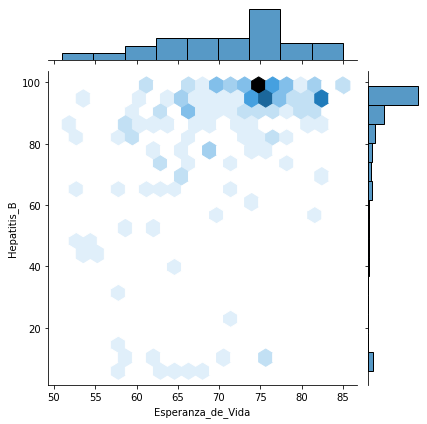

In [42]:
sns.jointplot(x='Esperanza_de_Vida', y='Hepatitis_B', data=Data2015, kind='hex', gridsize=20)

Conclusión: Hay más personas que tenían hepatitis B después de tener 75 años.

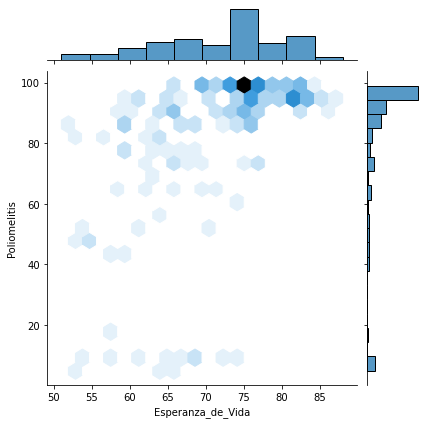

In [43]:
sns.jointplot(x='Esperanza_de_Vida', y='Poliomelitis', data=Data2015, kind='hex', gridsize=20)

Conclusión: Existían al menos 100 personas con inmunización contra la poliomielitis (Pol3) entre los niños de 1 año o más.

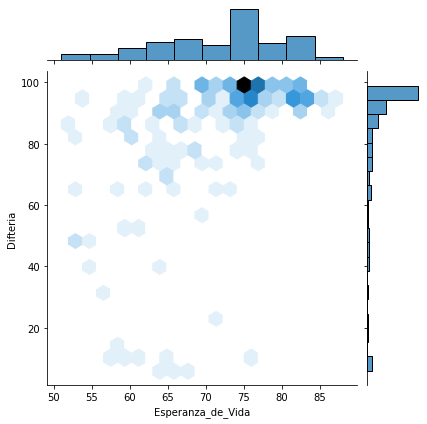

In [44]:
sns.jointplot(x='Esperanza_de_Vida', y='Difteria', data=Data2015, kind='hex', gridsize=20)

Conclusión: El 100% de las personas tenian cobertura de vacunación con toxoide tetánico diftérico y tos ferina (DTP3) en niños de 1 año. Estas tienen una esperanza de vida de hasta 85 años.

### **Box plots**

Gráficas para revisar como se distribuye la esperanza de vida en cada tipo de estatus del año 2015.

<AxesSubplot:xlabel='Estatus', ylabel='Esperanza_de_Vida'>

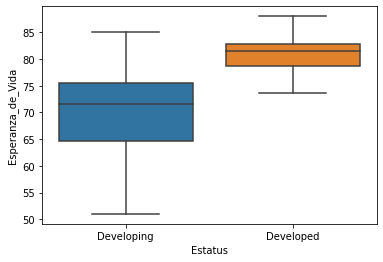

In [45]:
est = Data2015[Data2015.Estatus.isin(Data2015.Estatus.value_counts().head().index)]
sns.boxplot(
    x='Estatus',
    y='Esperanza_de_Vida',
    data=est
)

<AxesSubplot:xlabel='Estatus', ylabel='Esperanza_de_Vida'>

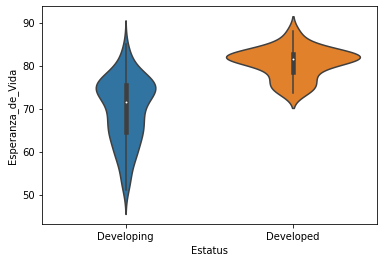

In [46]:
sns.violinplot(
    x='Estatus',
    y='Esperanza_de_Vida',
    data=est
)

Conclusión: La esperanza de vida para los paises en desarrollo esta entre los 65 a 75 años, mientras que los países desarrollados se encuentra entre los 76 a 83 años.

In [49]:
import pandas as pd
import pandas as profiling
Data2015.head()

,Pais,Anio,Estatus,Esperanza_de_Vida,Mortalidad_de_adultos,Mortalidad_infantil,Alcohol,Hepatitis_B,Sarampion,indice_masa_corporal,muertes_niños,Poliomelitis,Difteria,VIH_SIDA,Poblacion
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,65.0,1154,19.1,83,6.0,65.0,0.1,33736494.0
16,Albania,2015,Developing,77.8,74.0,0,4.60,99.0,0,58.0,0,99.0,99.0,0.1,28873.0
32,Algeria,2015,Developing,75.6,19.0,21,NaN,95.0,63,59.5,24,95.0,95.0,0.1,39871528.0
48,Angola,2015,Developing,52.4,335.0,66,NaN,64.0,118,23.3,98,7.0,64.0,1.9,2785935.0
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,99.0,0,47.7,0,86.0,99.0,0.2,NaN


Pairplots de distintas variables.

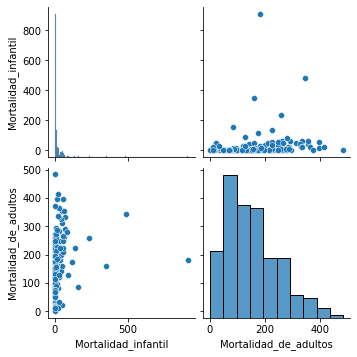

In [53]:
sns.pairplot(Data2015[['Mortalidad_infantil','Mortalidad_de_adultos']])

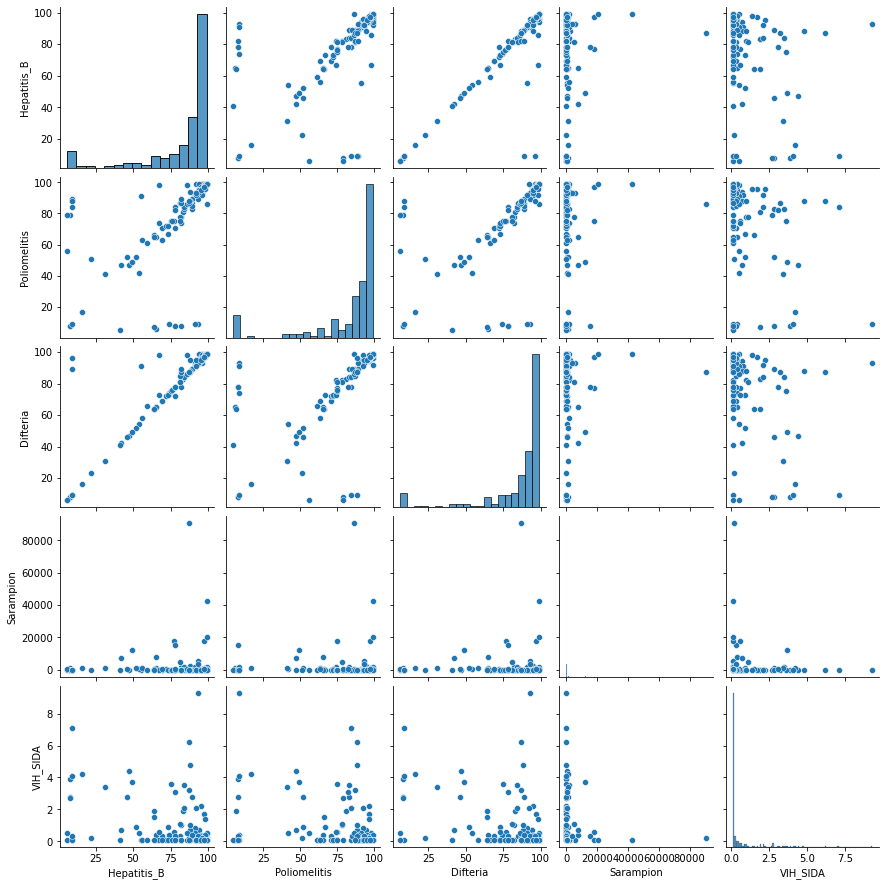

In [52]:
sns.pairplot(Data2015[['Hepatitis_B','Poliomelitis','Difteria','Sarampion','VIH_SIDA']])

Conclusión: Podemos visualizar la relación así como la distribución de ciertas variables como las enfermedades, la mortalidad de adultos y de niños.

### **Gráficas multivariantes**


Gráfico de dispersión de países desarrollados y en desarrollo.

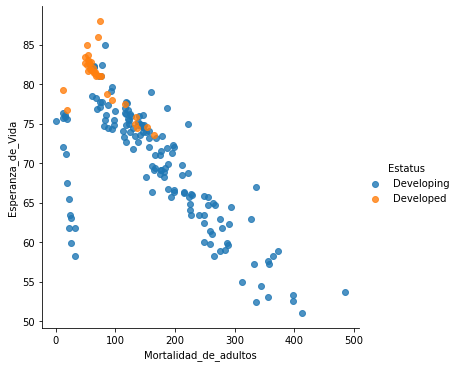

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='Mortalidad_de_adultos',y='Esperanza_de_Vida',hue='Estatus',data=Data2015.loc[Data2015['Estatus'].isin(['Developing','Developed'])],fit_reg=False)

Conclusión: Como se observa en el gráfico existen más muertes de adultos en países que estan en desarrollo, mientras que los países desarrollados tienen más esperanza de vida.

Histogramas para comparación de cantidad de países desarrollados y en desarrollo.

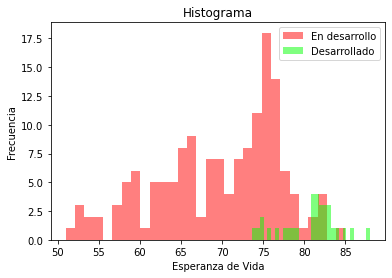

In [55]:
m = plt.hist(Data2015[Data2015["Estatus"] == "Developing"].Esperanza_de_Vida,bins=30,fc = (1,0,0,0.5),label = "En desarrollo")
b = plt.hist(Data2015[Data2015["Estatus"] == "Developed"].Esperanza_de_Vida,bins=30,fc = (0,1,0,0.5),label = "Desarrollado")
plt.legend()
plt.xlabel("Esperanza de Vida")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

Conclusión: La esperanza de vida para los países en desarrollo esta entre los 50 a 85 años, mientras que los países desarrollados se encuentra entre los 74 a 85 años o más, a diferencia de la otras gráficas esta puede ser más exacta en cuanto a los años de vida de una persona.

Boxplots para comparación de cobertura de inmunización por hepatitis B (HepB), poliomelitis (Pol3) y difteria tétanos y tos ferina en porcentaje de niños de 1 año en países desarrollados y en desarrollo.

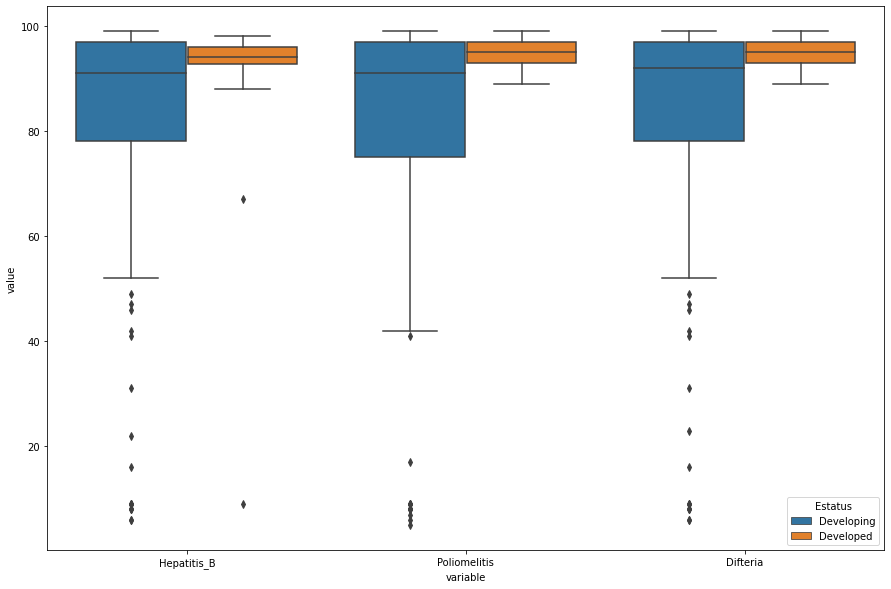

In [56]:
mdata=pd.melt(Data2015,id_vars = "Estatus", value_vars = ['Hepatitis_B','Poliomelitis','Difteria'])
plt.figure(figsize=(15,10))
sns.boxplot(x="variable",y="value",hue="Estatus",data=mdata)
plt.show()

Conclusión: Los países desarrollados estan cubiertos por el mismo porcentaje de inmunización por poliomelitis (Pol3) y difteria tétanos y tos ferina en niños de 1 año excepto hepatitis B (HepB).

Mapa de correlación de variables del año 2015.

El gráfico nos indica el nivel de correlación con respecto a cada unas de la variables.

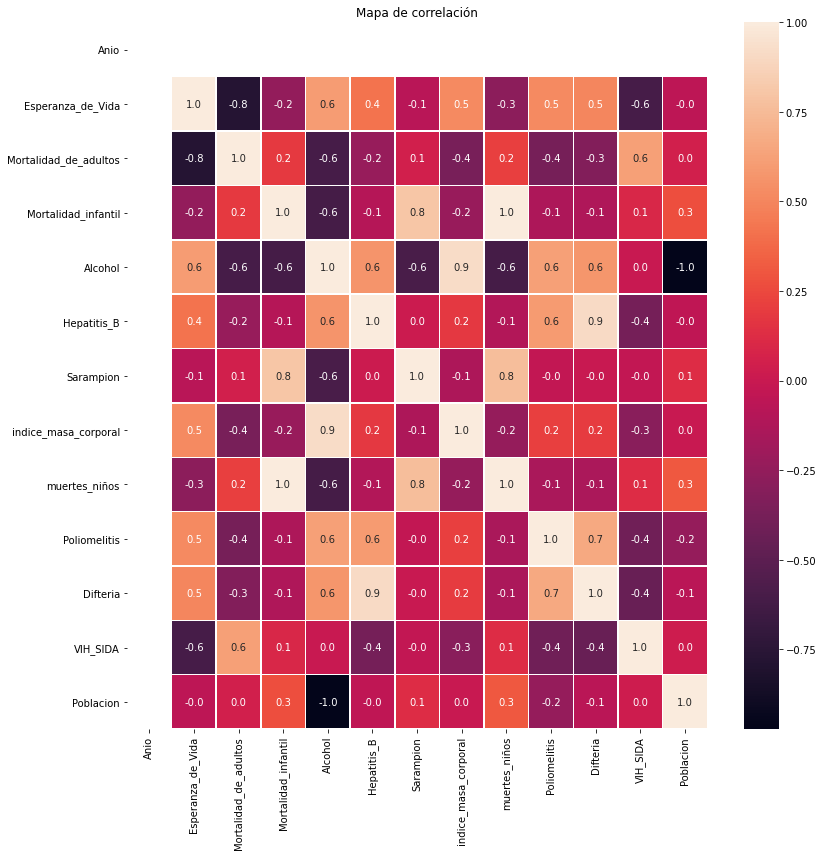

In [59]:
f,ax=plt.subplots(figsize=(13,13))
sns.heatmap(Data2015.corr(),annot=True,linewidths=0.5,fmt=".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Conclusión: Aqui podemos notar varios puntos.
- La hepatitis B y la Difteria estan muy altamente correlacionadas, esto nos puede indicar que si tienes alguna de estas enfermedades podrías obtener la otra.
- Las muertes de los niños se podría relacionar con la enfermedad del sarampión.
- Las muertes por VIH no tienen nada que ver con el consumo del alcohol.

# **Segunda base de datos**
## **Netflix**

#### a) Mostrar lo datos sin manipulacion:
- Importar librerias y leer los datos.

In [62]:
import pandas as pd
import numpy as np
import matplotlib as plt
import json
import io
import csv

data_netflix= pd.read_csv('netflix_titles.csv',na_values=[" "])
data_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


**Limpieza de datos.**

In [63]:
data_netflix.rename(columns = {'show_id':'Id','type':'Tipo','title':'Titulo','director':'Director','cast':'Elenco','country':'Pais','date_added':'Fecha_de_Alta','release_year':'Año_de_Lanzamiento','rating':'Calificacion','duration':'Duracion', 'listed_in':'Enumerados_en', 'description':'Descripción'},inplace=True)
dfN=data_netflix.drop(['Tipo','Año_de_Lanzamiento','Calificacion','Duracion'], axis = 1 )
dfN

,Id,Titulo,Director,Elenco,Pais,Fecha_de_Alta,Enumerados_en,Descripción
0,s1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020","International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016","Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018","Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017","Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...
7782,s7783,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020","Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019","Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020","Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020","International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


**Información estadística.**

Por el tipo de información que contiene la base de datos al no ser numeríca no podemos realizar una información estadística.

# **Gráfico de datos univariantes**

### **Gráfico de barras**

<AxesSubplot:>

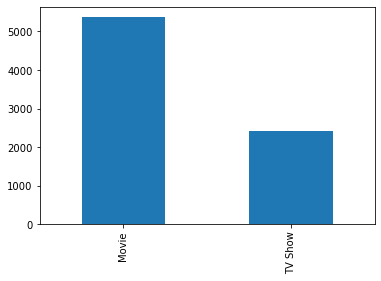

In [64]:
data_netflix['Tipo'].value_counts().head().plot.bar()

Conclusión: Esta gráfica nos muestra que hay más programas de tipo "Movie" que de "TV Shows" en la base de datos.

Gráfica de la proporción de cada tipo del total de programas.

<AxesSubplot:>

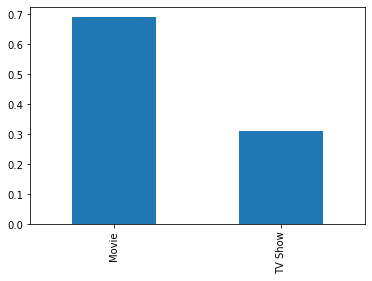

In [81]:
(data_netflix['Tipo'].value_counts() / len(data_netflix)).plot.bar()

Conclusión: Observamos que la mayoría de los programas son tipo "Movie" siendo estos el 69% aprox. y solo el 31% aprox. de los programas tipo "TV Show".

<AxesSubplot:>

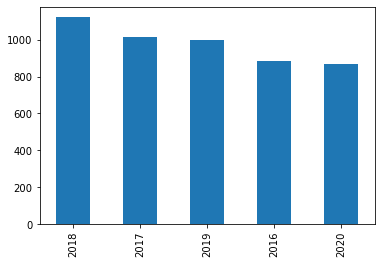

In [65]:
data_netflix['Año_de_Lanzamiento'].value_counts().head().plot.bar()

Conclusión: Claramente, podemos apreciar que en el año 2018, fue el año en el que más contenido se lanzó en netflix y en el 2020 fue el año con menor cantidad de programas lanzados.

<AxesSubplot:>

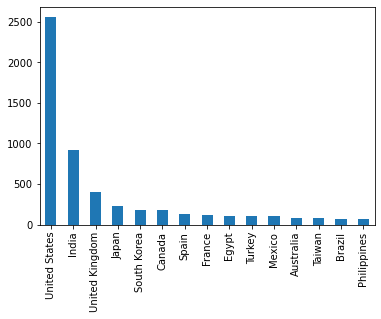

In [66]:
data_netflix['Pais'].value_counts().head(15).plot.bar()

**Pregunta 1.**

Que representan los datos de la gráfica de arriba.

La gráfica anterior muestra los países que mas lanzamientos han tenido para el contenido de netflix y son Estados unidos, India y Reino unido.


### **Gráfica de líneas**

<AxesSubplot:>

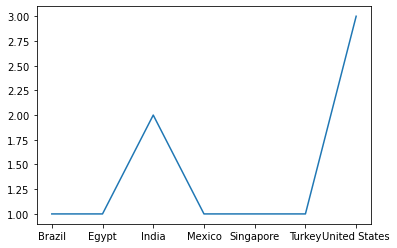

In [68]:
dfN['Pais'].head(10).value_counts().sort_index().plot.line()

<AxesSubplot:>

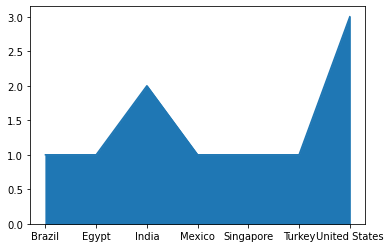

In [69]:
dfN['Pais'].head(10).value_counts().sort_index().plot.area()

Conclusión: Éstas gráficas nos muestran como se distribuye el contenido de netflix en los diferentes países, tanto en líneas como en una figura que es el área.

### **Histogramas** 

<AxesSubplot:>

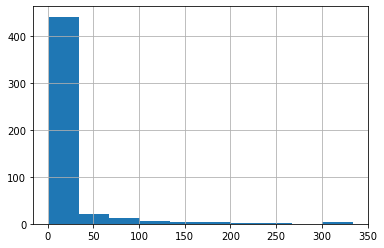

In [70]:
data_netflix['Enumerados_en'].sort_index().value_counts().hist()

Conclusión: Podemos visualizar la frecuencia de las diferentes clasificaciones en las que se enumeran los programas.

# **Graficar datos bi-variantes**

### **Scatter plot**

No se puede realizar debido a que no tenemos datos numéricos. 

### **Stacked plots**

No se puede realizar debido a que no tenemos datos numéricos. 

C:\Users\lesli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Año_de_Lanzamiento', ylabel='count'>

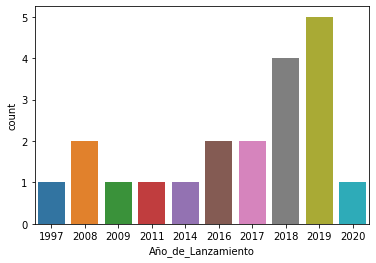

In [71]:
import seaborn as sns
sns.countplot(data_netflix['Año_de_Lanzamiento'].head(20))

<AxesSubplot:xlabel='Año_de_Lanzamiento', ylabel='Density'>

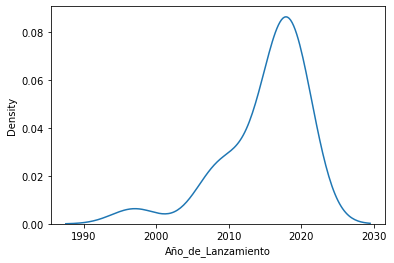

In [72]:
sns.kdeplot(data_netflix['Año_de_Lanzamiento'].head(20))

<AxesSubplot:>

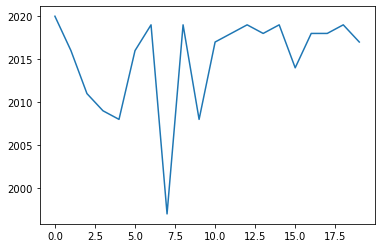

In [73]:
data_netflix['Año_de_Lanzamiento'].head(20).plot.line()

Conclusión: En las tres gráficas podemos visualizar los años de lanzamientos de los primeros 20 programas de netflix. 

C:\Users\lesli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Enumerados_en'>

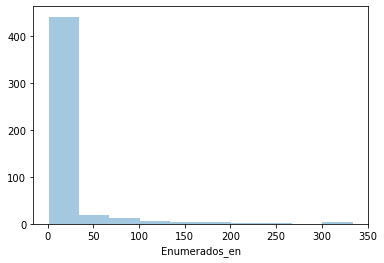

In [74]:
sns.distplot(data_netflix['Enumerados_en'].sort_index().value_counts(), bins=10, kde=False)

Conclusión: Podemos visualizar la frecuencia de las diferentes clasificaciones en las que se enumeran los programas.

**Las siguientes gráficas no se pueden realizar debido a que se necesitan dos variables, lo cual es difícil, ya que la base no cuenta con datos númericos.**

# **Puntos extra:**


*   Realizar una o más gráficas (con las mismas o diferentes librerías de las que se utilizaron en este trabajo) diferentes a las que están en la práctica.

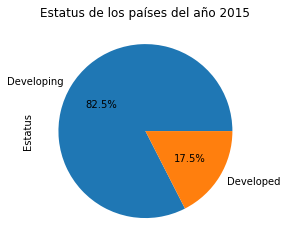

In [78]:
import matplotlib as plt 
from matplotlib import pyplot
Data2015['Estatus'].value_counts().plot.pie(autopct="%0.1f%%")
plt.pyplot.title("Estatus de los países del año 2015")
plt.pyplot.show()

Conclusión: Observamos que la mayoría de los países del año 2015 estan en desarrollo siendo estos el 82.5% y solo un 17.5% desarrollados.

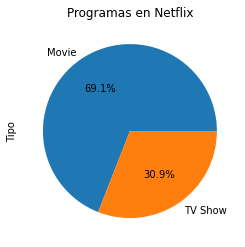

In [76]:
import matplotlib as plt 
from matplotlib import pyplot
data_netflix['Tipo'].value_counts().plot.pie(autopct="%0.1f%%")
plt.pyplot.title("Programas en Netflix")
plt.pyplot.show()

Conclusión: Esta gráfica nos muestra que el 69.1% son programas de tipo "Movie" y el 30.9% son "TV Shows".

- Realizar una comparación entre dos gráficas diferentes que parezcan dar la misma información. Cuál es mejor en qué caso y explicar por qué.

Gráfico de dispersión

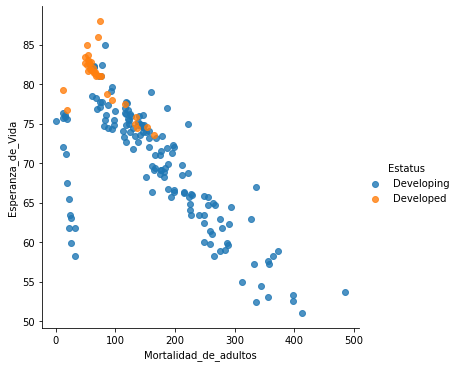

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='Mortalidad_de_adultos',y='Esperanza_de_Vida',hue='Estatus',data=Data2015.loc[Data2015['Estatus'].isin(['Developing','Developed'])],fit_reg=False)

Histograma


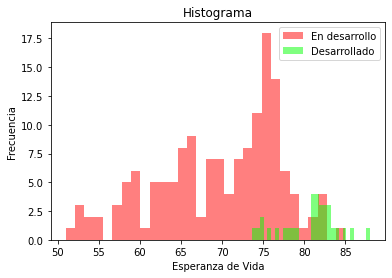

In [80]:
m = plt.hist(Data2015[Data2015["Estatus"] == "Developing"].Esperanza_de_Vida,bins=30,fc = (1,0,0,0.5),label = "En desarrollo")
b = plt.hist(Data2015[Data2015["Estatus"] == "Developed"].Esperanza_de_Vida,bins=30,fc = (0,1,0,0.5),label = "Desarrollado")
plt.legend()
plt.xlabel("Esperanza de Vida")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

### **Comparación**
- El diagrama de dispersión se usa comúnmente para mostrar cómo dos variables se relacionan entre sí. 
- Los histogramas son gráficos que indican la frecuencia de un hecho mediante una distribución de los datos.

Como queremos ver que tanto se relacionan las variables, el diagrama de dispersión nos ayudaria a identificar esta relación.

Gráfico de barras

<AxesSubplot:>

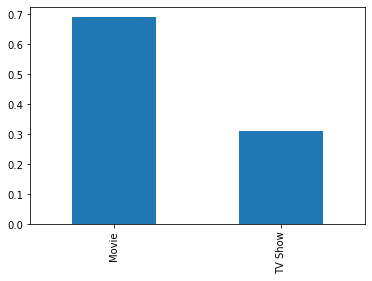

In [82]:
(data_netflix['Tipo'].value_counts() / len(data_netflix)).plot.bar()

Gráfico de pastel

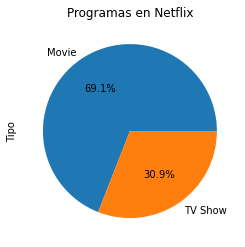

In [83]:
import matplotlib as plt 
from matplotlib import pyplot
data_netflix['Tipo'].value_counts().plot.pie(autopct="%0.1f%%")
plt.pyplot.title("Programas en Netflix")
plt.pyplot.show()

### **Comparación**
- El gráfico de barras se utiliza para comparar dos o más valores.
- El gráfico de pastel se utiliza para mostrar la proporción le corresponde a cada categoría.

Como queremos visualizar la proporción de los tipos de programas que hay en netflix, el gráfico adecuado seria el de pastel ya que se visualiza mucho mejor y la proporción puede ser más exacta que la de barras. 